In [2]:
# using pandas and numpy 
import pandas as pd
import numpy as np

In [3]:
## fetching data 
#Removig junkfile
CarPricesData1=pd.read_csv('C:/Users/USER/AppData/Roaming/Microsoft/Windows/Start Menu/Programs/Anaconda3 (64-bit)/New folder/CarPrice_Assignment.csv',encoding='latin1')
CarPricesData=CarPricesData1.drop(['car_ID','symboling','CarName'],axis=1)
CarPricesData.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# problem statement is to predict Price 
# price is the target variable


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3DA95A7B8>]],
      dtype=object)

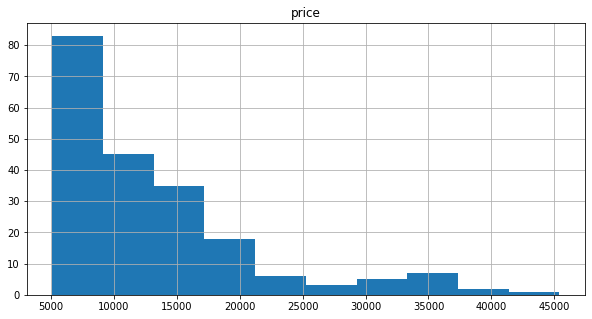

In [5]:
# visual diagram of price
%matplotlib inline
CarPricesData1.hist('price',figsize=(10,5))


In [6]:
# understaning predictors 
CarPricesData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price         

In [7]:
# fuel type is a chategorical data is not continuous data type
# few missing values are there 
# mostly predictors are continuous

In [8]:
# correlation between predictors and target 
CarPricesData.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3DAA48358>,
      dtype=object)

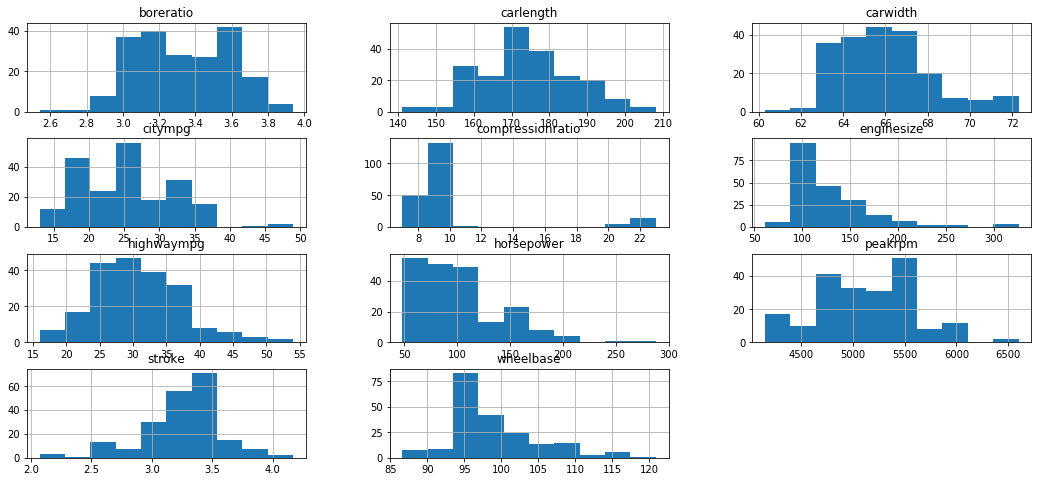

In [9]:
CarPricesData.hist(['wheelbase', 'carlength', 'carwidth', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio','horsepower','peakrpm','citympg','highwaympg'],figsize=(18,8))

In [10]:
def bringbarchart(inpdata,clt):
    import matplotlib.pyplot as plt
    fig,subplot=plt.subplots(nrows=1,ncols=len(clt),figsize=(10,5))
    fig.suptitle('plot chart of non continuous data type')
    for ColName,PlotNumber in zip(clt,range(len(clt))):
        CarPricesData.groupby(ColName).size().plot(kind='bar',ax=subplot[PlotNumber])

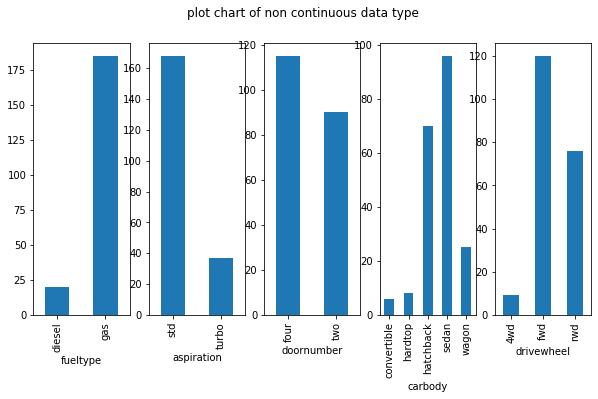

In [11]:
bringbarchart(inpdata=CarPricesData,clt=['fueltype','aspiration','doornumber','carbody','drivewheel'])

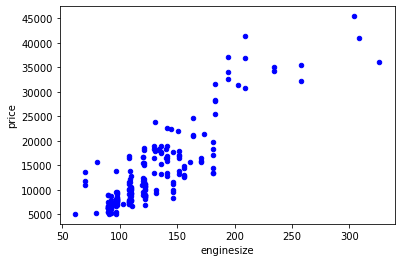

In [12]:

CarPricesData.plot.scatter(x='enginesize',y='price',marker='o',color='blue')

AxesSubplot(0.125,0.125;0.775x0.755)


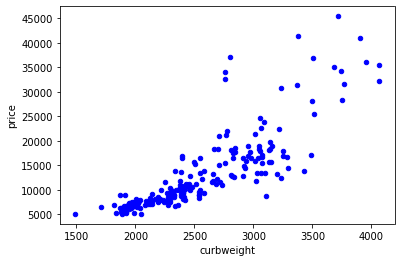

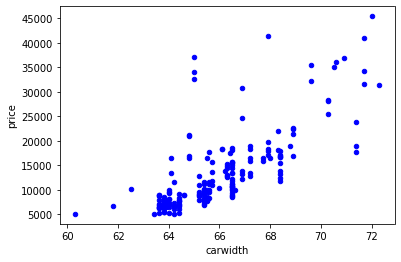

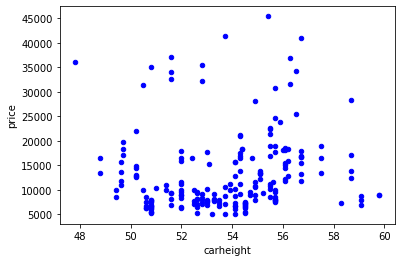

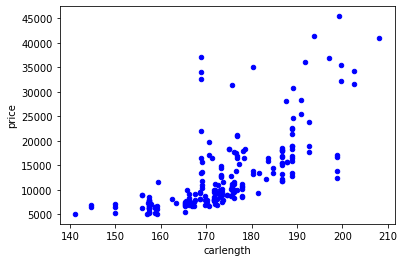

In [13]:
print(CarPricesData.plot.scatter(x='curbweight',y='price',marker='o',color='blue'))
CarPricesData.plot.scatter(x='carwidth',y='price',marker='o',color='blue')
CarPricesData.plot.scatter(x='carheight',y='price',marker='o',color='blue')
CarPricesData.plot.scatter(x='carlength',y='price',marker='o',color='blue')

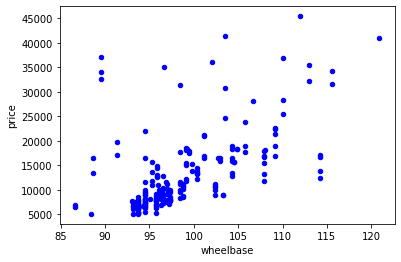

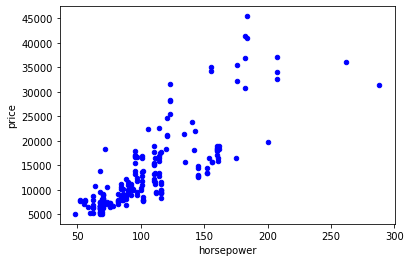

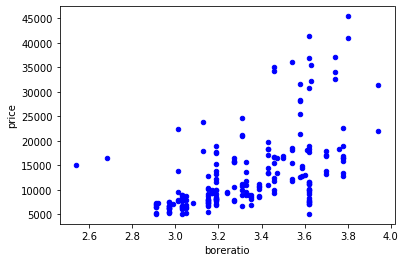

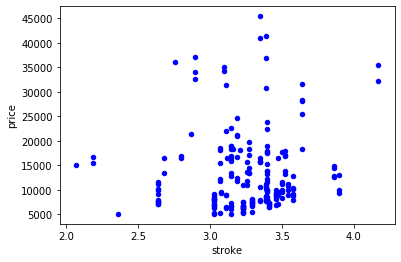

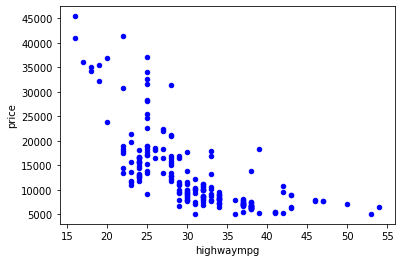

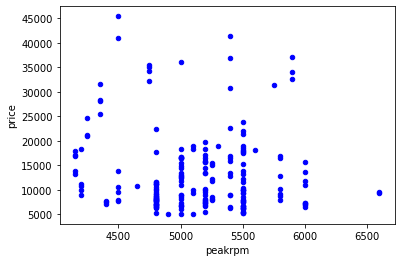

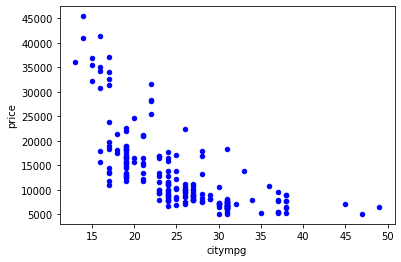

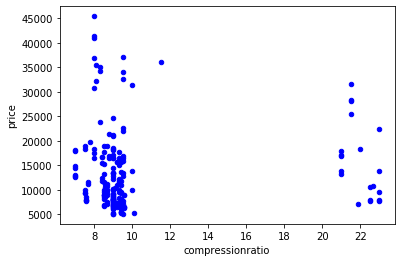

In [14]:
CarPricesData.plot.scatter(x='wheelbase',y='price',marker='o',color='blue')
CarPricesData.plot.scatter(x='horsepower',y='price',marker='o',color='blue')
CarPricesData.plot.scatter(x='boreratio',y='price',marker='o',color='blue')
CarPricesData.plot.scatter(x='stroke',y='price',marker='o',color='blue')
CarPricesData.plot.scatter(x='highwaympg',y='price',marker='o',color='blue')
CarPricesData.plot.scatter(x='peakrpm',y='price',marker='o',color='blue')
CarPricesData.plot.scatter(x='citympg',y='price',marker='o',color='blue')
CarPricesData.plot.scatter(x='compressionratio',y='price',marker='o',color='blue')


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


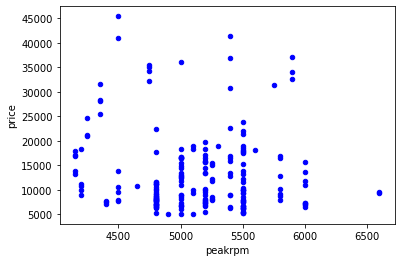

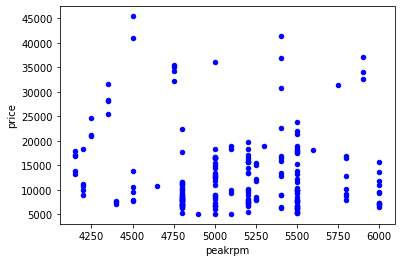

In [15]:
print(CarPricesData.plot.scatter(x='peakrpm',y='price',marker='o',color='blue'))
CarPricesData['peakrpm'][CarPricesData['peakrpm']>6000]=6000
CarPricesData.plot.scatter(x='peakrpm',y='price',marker='o',color='blue')
#removing outliers

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


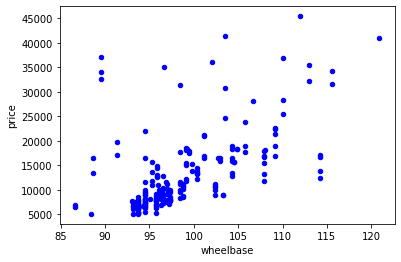

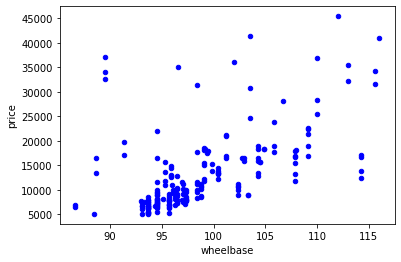

In [16]:
print(CarPricesData.plot.scatter(x='wheelbase',y='price',marker='o',color='blue'))
CarPricesData['wheelbase'][CarPricesData['wheelbase']>117]=116
CarPricesData.plot.scatter(x='wheelbase',y='price',marker='o',color='blue')

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


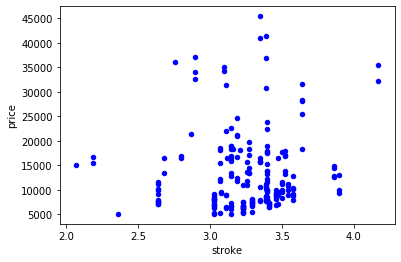

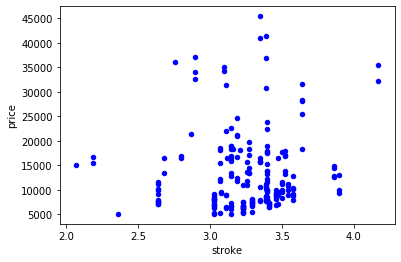

In [17]:
print(CarPricesData.plot.scatter(x='stroke',y='price',marker='o',color='blue'))
CarPricesData['horsepower'][CarPricesData['stroke']>4.0]=4.0
CarPricesData.plot.scatter(x='stroke',y='price',marker='o',color='blue')

In [18]:
# we removed outliers 
# there is a slight improvement in correlations of those predictors like 'Age','Weight','KM'
CarPricesData.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.875076,0.794817,0.592361,0.776287,0.559332,0.488239,0.161883,0.255292,0.243986,-0.362396,-0.469745,-0.542668,0.571502
carlength,0.875076,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.457800,-0.290892,-0.670909,-0.704662,0.682920
carwidth,0.794817,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.559385,-0.215717,-0.642704,-0.677218,0.759325
carheight,0.592361,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.091363,-0.324779,-0.048640,-0.107358,0.119336
curbweight,0.776287,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.618247,-0.268067,-0.757414,-0.797465,0.835305
enginesize,0.559332,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.666058,-0.243635,-0.653658,-0.677470,0.874145
boreratio,0.488239,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.519026,-0.258896,-0.584532,-0.587012,0.553173
stroke,0.161883,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,-0.042817,-0.063015,-0.042145,-0.043931,0.079443
compressionratio,0.255292,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.179841,-0.447269,0.324701,0.265201,0.067984
horsepower,0.243986,0.457800,0.559385,-0.091363,0.618247,0.666058,0.519026,-0.042817,-0.179841,1.000000,0.164448,-0.724542,-0.687995,0.688271


In [19]:
import os
os.getcwd()

'C:\\Users\\USER\\project 3 python'

In [20]:
######## ((((((((PREPROCESSING))))))))############
#_____

